In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
import ast
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

In [3]:
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

# 마이너스 깨짐 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
channel_a = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_channel_a_0816_0822.csv', index_col=0)
jtbc = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_jtbc_0816_0822.csv', index_col=0)
kbs = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_kbs_0816_0822.csv', index_col=0)
mbc = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_mbc_0816_0822.csv', index_col=0)
mbn = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_mbn_0816_0822.csv', index_col=0)
sbs = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_sbs_0816_0822.csv', index_col=0)
yonhab = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_yonhab_0816_0822.csv', index_col=0)
ytn = pd.read_csv('youtube_0816_0822/convert_token_to_id/id_ytn_0816_0822.csv', index_col=0)

In [7]:
channel_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   published_time              71 non-null     object 
 1   video_id                    71 non-null     object 
 2   video_url                   71 non-null     object 
 3   crawling_time               71 non-null     object 
 4   author                      71 non-null     object 
 5   title                       71 non-null     object 
 6   length                      71 non-null     float64
 7   rating                      71 non-null     float64
 8   views                       71 non-null     float64
 9   thumbnail_url               71 non-null     object 
 10  captions                    71 non-null     object 
 11  description                 71 non-null     object 
 12  comments                    71 non-null     object 
 13  cleaned_description         71 non-nu

In [8]:
needed_column = ['published_time', 'video_id', 'author', 'title', 'stemmed']

In [15]:
combined = pd.concat([channel_a[needed_column], jtbc[needed_column],
                      kbs[needed_column], mbc[needed_column],
                      mbn[needed_column], sbs[needed_column],
                      yonhab[needed_column], ytn[needed_column]],
                     axis=0)

In [21]:
combined.reset_index(drop=True, inplace=True)

In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   published_time  2362 non-null   object
 1   video_id        2362 non-null   object
 2   author          2362 non-null   object
 3   title           2362 non-null   object
 4   stemmed         2362 non-null   object
dtypes: object(5)
memory usage: 92.4+ KB


In [39]:
copy = combined.copy()

In [40]:
copy['datetime'] = pd.to_datetime(copy.published_time)

In [41]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   published_time  2362 non-null   object        
 1   video_id        2362 non-null   object        
 2   author          2362 non-null   object        
 3   title           2362 non-null   object        
 4   stemmed         2362 non-null   object        
 5   datetime        2362 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 110.8+ KB


In [42]:
copy.set_index('datetime', inplace=True)

In [45]:
copy.sort_index(inplace=True)

In [51]:
copy['stemmed_list'] = [ast.literal_eval(element) for element in copy.stemmed]

In [57]:
by_day = pd.DataFrame(copy[['stemmed_list']].resample('1D').sum())

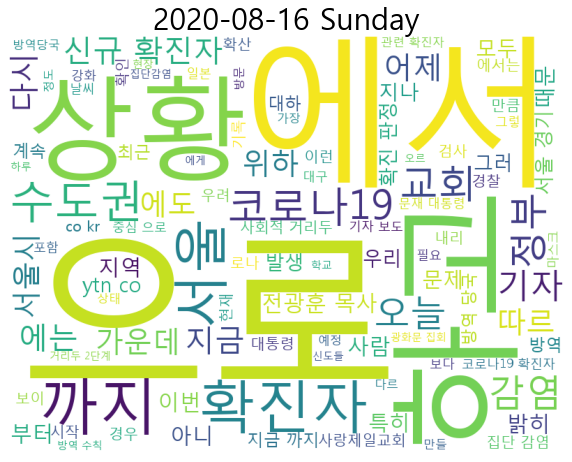

In [85]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[0]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[0].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

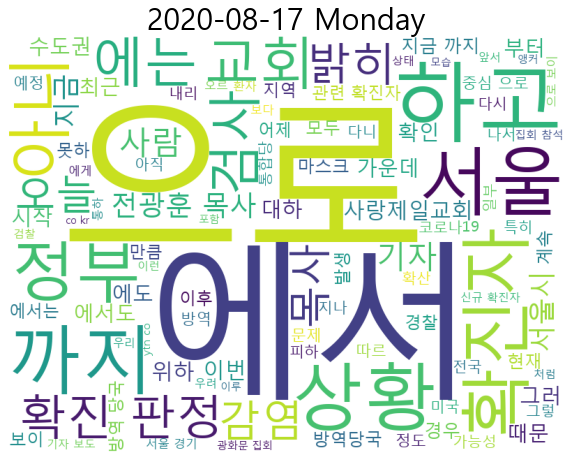

In [86]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[1]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[1].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

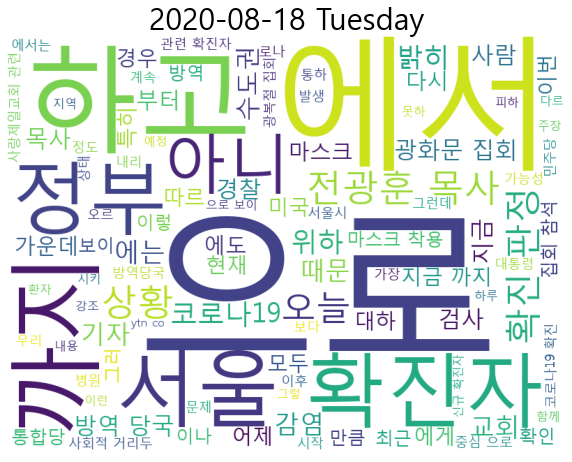

In [87]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[2]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[2].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

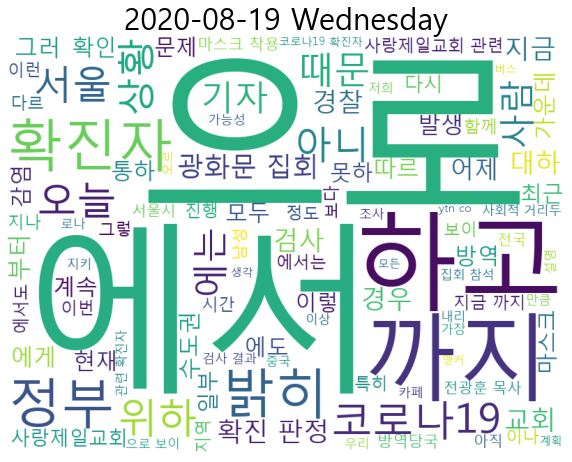

In [88]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[3]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[3].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

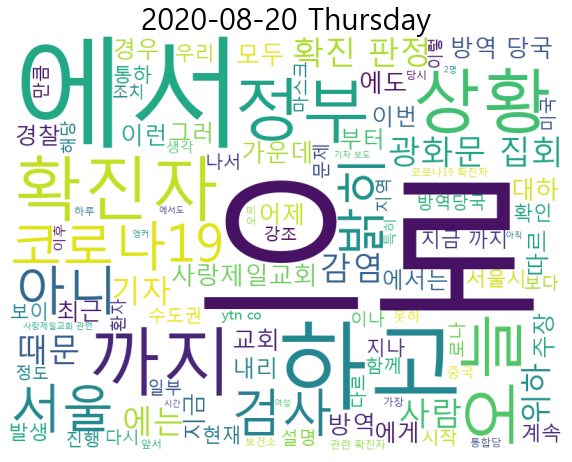

In [89]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[4]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[4].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

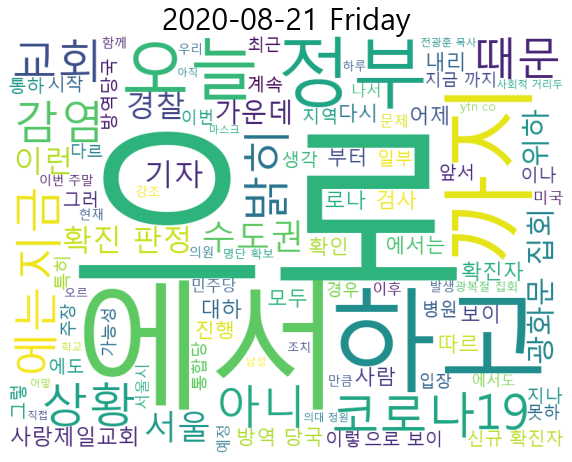

In [90]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[5]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[5].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

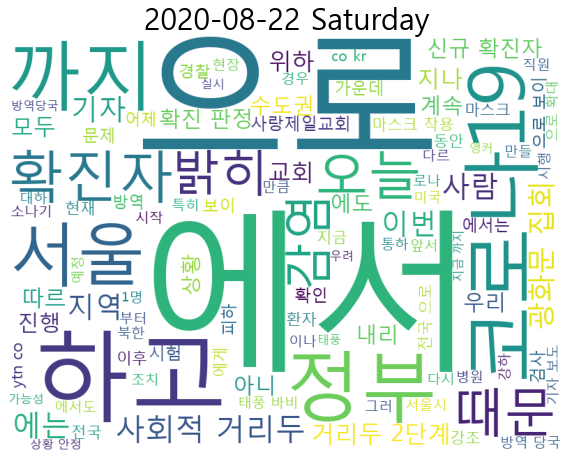

In [91]:
wordcloud = WordCloud(
    font_path=font,
    width=800,
    height=600,
    background_color='white',
    max_words=100)
    
wordcloud = wordcloud.generate(' '.join(by_day.stemmed_list[6]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(by_day.index[6].strftime('%Y-%m-%d %A'), fontsize=30)
plt.show()

문장 구성 => 조사, 접속사 등 불용어 처리가 심하면 자연스러운 문장이 안될 것 같음

워드 클라우드 => 조사, 접속사 등 불용어 처리를 조금 더 엄격하게 해야 될 것 같다

따라서 불용어 처리를 더 해야겠다

# 불용어 처리 추가로 한 뒤 워드클라우드 생성

In [197]:
from konlpy.tag import Hannanum

In [198]:
han = Hannanum()

In [199]:
han.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

+ 제거하는 품사

{'E': '어미',
'EC': '연결 어미',
'EF': '종결 어미',
'EP': '선어말어미',
'ET': '전성 어미',
'S': '기호',
'I': '독립언',
'II': '감탄사',
'J': '관계언'}

In [200]:
needed_column = ['published_time', 'video_id', 'author', 'title', 'cleaned_description', 'stemmed']
combined2 = pd.concat([channel_a[needed_column], jtbc[needed_column],
                      kbs[needed_column], mbc[needed_column],
                      mbn[needed_column], sbs[needed_column],
                      yonhab[needed_column], ytn[needed_column]],
                     axis=0)

In [201]:
stopwords_df = pd.read_csv('stopwords_concat.csv')
stopwords_list = stopwords_df.stopwords

In [202]:
stopwords_list

0       이
1       있
2       하
3       것
4       들
       ..
770    일곱
771    여덟
772    아홉
773     령
774     영
Name: stopwords, Length: 775, dtype: object

In [203]:
add_stopwords  = ['아니', '오늘', '어제', '내일', '지금', '이번', '위하',
                  '이런', '이렇', '때문', '이런', '이후', 'co', 'kr', 'ytn', 'YTN']

stopwords = list(set(stopwords_list))

for element in add_stopwords:
    if element not in stopwords:
        stopwords.append(element)

In [204]:
def stemming_and_remove_stopwords(row, tagging_method, stopwords):
    '''기사 본문 품사태깅 후 어미가 아닌 형태소들만 추출한 뒤 불용어 제거'''
    
    stem_list = []
    tagged = tagging_method.pos(row)
    
    for element in tagged:
        # {'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미',
        #  'S': '기호', 'I': '독립언', 'II': '감탄사', 'J': '관계언'} 제거
        # 불용어 제거
        if element[1] not in ['E', 'EC', 'EF', 'EP', 'ET', 'S', 'I', 'II', 'J'] and element[0] not in stopwords:
            stem_list.append(element[0])
    
    return stem_list

def df_stemming_and_remove_stopwords(DataFrame, stopwords):
    '''stemming_and_remove_stopwords을 DataFrame에 적용'''
    
    copy = DataFrame.copy()
    
    han = Hannanum() # tagging_method
    cleaned_description = copy.cleaned_description
    stemmed = []
    
    for element in cleaned_description:
        stem = stemming_and_remove_stopwords(row=element,
                                             tagging_method=han,
                                             stopwords=stopwords)
        stemmed.append(stem)
    
    copy['stemmed'] = stemmed
    
    return copy

In [205]:
stemmed_combined2 = df_stemming_and_remove_stopwords(DataFrame=combined2,
                                                     stopwords=stopwords)

In [206]:
stemmed_combined2.reset_index(drop=True, inplace=True)

In [207]:
stemmed_combined2['datetime'] = pd.to_datetime(stemmed_combined2.published_time)

In [208]:
stemmed_combined2.set_index('datetime', inplace=True)

In [209]:
stemmed_combined2.sort_index(inplace=True)

In [210]:
by_day2 = pd.DataFrame(stemmed_combined2[['stemmed']].resample('1D').sum())

In [211]:
by_day2

,stemmed
datetime,
2020-08-16,"[수도권, 코로나19, 비상, 서울,, 경기, 거리두, 2단계, 앵커, 코로나19,..."
2020-08-17,"[미국, 국립기상청, 캘리포니아, 산불, 화재, 현장, 최대, 시속, 60마일, 달..."
2020-08-18,"[파이어, 경고, 발령, 미, 캘리포니아, 산불, 악화일로, [굿모닝, MBN, 섭..."
2020-08-19,"[[고현준, 뉴스딱]시사평론, 고현준, 뉴스딱, 첫, 소식, 70대, 접, 포르투갈..."
2020-08-20,"[코로나19, 집단감염, 발생, 서울, 사랑제일교회, 전광훈, 목사, 정부, 교인,..."
2020-08-21,"[[고현준, 뉴스딱]시사평론, 고현준, 금요일, 뉴스딱, 첫, 소식, 사우디아라비아..."
2020-08-22,"[경찰, 사랑제일교회, 압수수색, 4시간20분만, 종료, 코로나19, 집단감염, 발..."


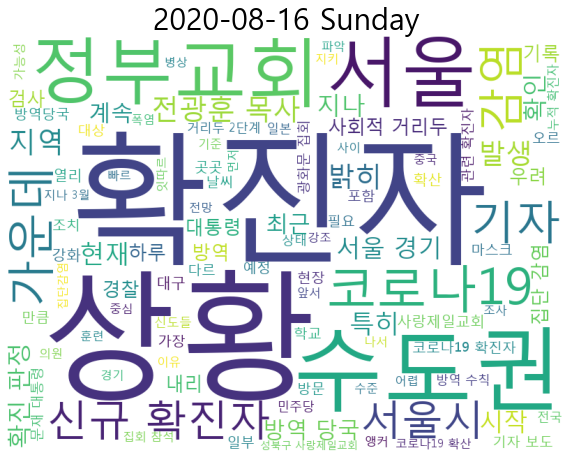

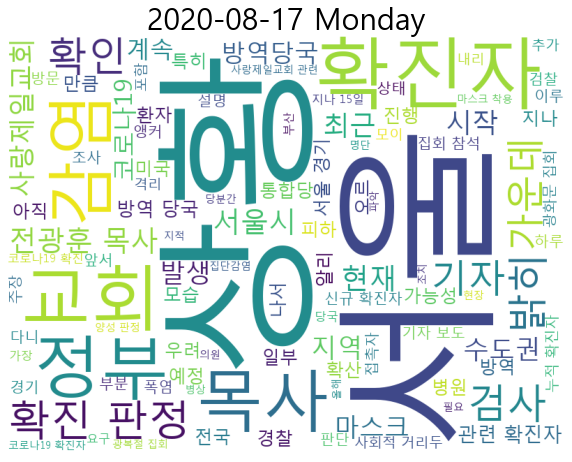

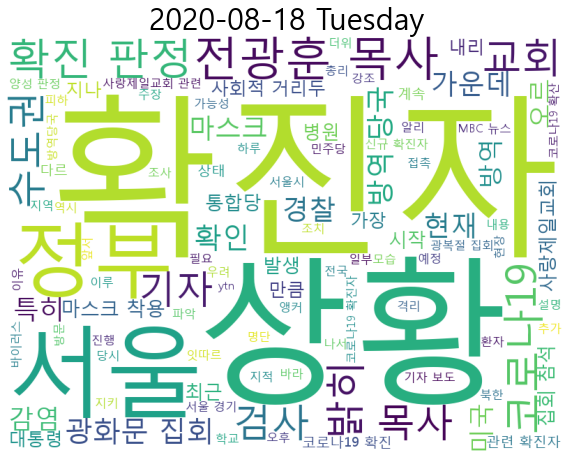

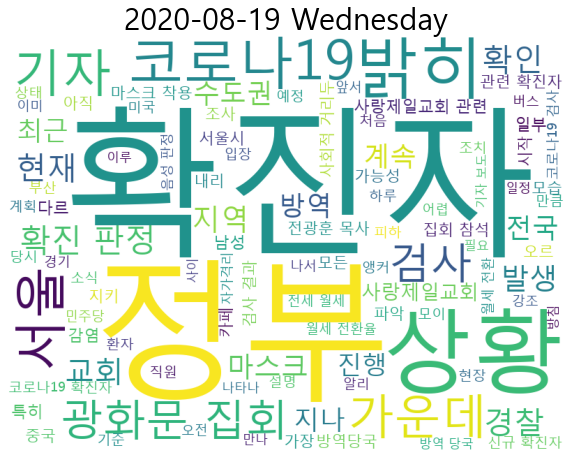

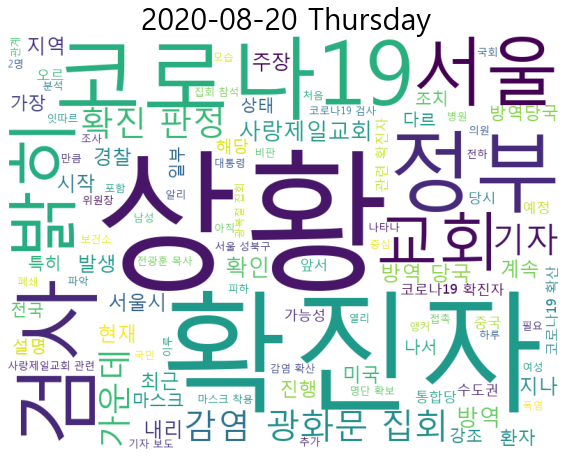

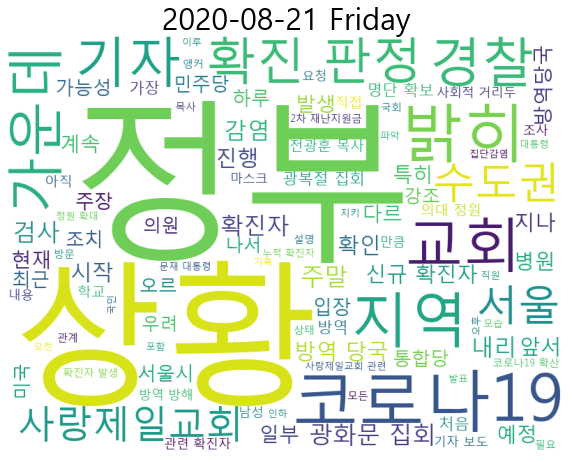

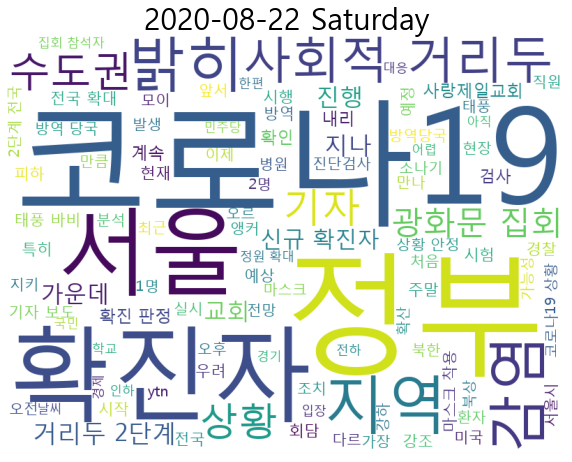

In [212]:
for i in range(by_day2.shape[0]):
    wordcloud = WordCloud(
        font_path=font,
        width=800,
        height=600,
        background_color='white',
        max_words=100)

    wordcloud = wordcloud.generate(' '.join(by_day2.stemmed[i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(by_day2.index[i].strftime('%Y-%m-%d %A'), fontsize=30)
    
    # 워드클라우드 jpg 파일로 저장
    plt.savefig('wordcloud/' + by_day2.index[i].strftime('%Y-%m-%d') + '.jpg', bbox_inches='tight')
    plt.show()

### 워드클라우드에서 주목할만한 부분

코로나19, 확진자, 감염이 가장 크게, 많이 등장 : 뉴스 채널에서 가장 많이 주목하고 있는 이슈

전광훈 목사, 사랑제일교회, 광화문 집회 : 코로나19의 재확산의 원인이기때문에 등장 빈도 높음

마스크, 방역, 사회적 거리두기 : 코로나19의 확산에 대한 대응책

정부 : 방역, 사회적 거리두기 등 코로나19의 대응책을 공표하는 주체이기 때문에 빈도가 높은 것 같음

서울, 수도권 : 코로나19가 전국적으로 확산되고 있지만 서울과 수도권에서 집중적으로 확산되고 있기 때문에 언급빈도가 높은 것 같음

상황 : 언론이 과거의 사건을 다루는 보도나 미래 전망을 예측하는 보도보다는 현재 시점의 사태를 알리는데 집중하고 있기 때문에 많이 등장하는듯 함

8월 16일에는 등장하지 않았던 태풍, 태풍 바비가 8월 22일부터 등장하기 시작

또한 의대 정원 확대 이슈가 8월 22일부터 워드클라우드에 등장한 것을 확인할 수 있음